In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
df = pd.read_csv("coursea_data.csv", index_col=0)
def convert_enrolled(val):
    if isinstance(val, str) and "k" in val.lower():
        return float(val.lower().strip().replace("k", "")) * 1000
    elif isinstance(val, str) and "m" in val.lower():
        return float(val.lower().strip().replace("m", "")) * 1000000
    else:
        return float(val)

df.course_students_enrolled = df.course_students_enrolled.apply(convert_enrolled)

df.index = df.index.sort_values()

# Data visualization
***
## Overview
This data set contains 891 rows with 6 features.  
With 4 categorical features:
1. Course title
2. Course organization
3. Course certification type
   - Course
   - Specialization
   - Professional Certificate
5. Course difficulty
   - Beginner
   - Intermediate
   - Advanced
   - Mixed
    
And 2 numeric features:
1. Course rating
2. Course students enrolled

In [2]:
print("Total data rows:", df.index.value_counts().sum())
print(df.course_Certificate_type.unique())
print(df.course_difficulty.unique())
df.head()

Total data rows: 891
['SPECIALIZATION' 'COURSE' 'PROFESSIONAL CERTIFICATE']
['Beginner' 'Intermediate' 'Mixed' 'Advanced']


,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5300.0
1,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17000.0
2,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130000.0
3,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91000.0
4,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320000.0


### Duplicates and null values
- There's one organization providing one course with same title but certification and course difficulty are diferent. Also there's students enrolled diference.
- This data set has no missing or invalid values.

In [3]:
df[df[["course_title", "course_organization"]].duplicated(keep=False)]

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
224,Developing Your Musicianship,Berklee College of Music,COURSE,4.8,Mixed,41000.0
225,Developing Your Musicianship,Berklee College of Music,SPECIALIZATION,4.8,Beginner,54000.0


### Null values

In [4]:
df.isnull().sum().sum()

np.int64(0)

***
## Rating and students enrolled outliers

### A total of 154 organizations, offering 888 diferent courses
- 17 courses falls to low outliers by rating, mean of 4.05 out of 5 with worst rated 3.3.
- 78 courses with high outliers by students enrolled, mean of close to 460,000 with most popular at 3,200,000 students enrolled.
- None of these outliers intertwine.

In [5]:
print("Total unique courses:", df.course_title.str.strip().nunique())
print("Total unique oragnizations:", df.course_organization.str.strip().nunique())

Total unique courses: 888
Total unique oragnizations: 154


In [6]:
num_csv = df.select_dtypes(include=[float, int])
descr = num_csv.describe()
q1 = descr.loc["25%"]
q3 = descr.loc["75%"]
iqr = q3-q1
lower = q1-1.5*iqr
upper = q3+1.5*iqr
outl_low = num_csv[(num_csv < lower)]
outl_high = num_csv[(num_csv > upper)]
outl_low.notna().sum()
outl_high.notna().sum()

low = outl_low[outl_low.notna()]
print("Total low outliers - by course rating only:", low.course_rating.dropna(how = "all").value_counts().sum())
print("Min score:", low.course_rating.min())
print(low.mean().round(2))
print("\n")
high = outl_high[outl_high.notna()]
print("Total high outliers - by course students enrolled only:", high.course_students_enrolled.dropna(how = "all").value_counts().sum())
print("Max students enrolled:", high.course_students_enrolled.max())
print(high.mean().round())

Total low outliers - by course rating only: 17
Min score: 3.3
course_rating               4.05
course_students_enrolled     NaN
dtype: float64


Total high outliers - by course students enrolled only: 78
Max students enrolled: 3200000.0
course_rating                    NaN
course_students_enrolled    459615.0
dtype: float64


### Lowest and highest rated courses
Only 4 courses with rating less than 4.0.  
- 3 out of 4 has course difficulty at Intermediate and certificate type - specialization.  
- Worst rated course at 3.3 has difficulty at Mixed and certification type  - course. It also has most students enrolled compared to other lowest ranked courses.

Courses has varying students range from 15,000 to 140,000.

In [7]:
df[df.course_rating.lt(4)]

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
413,How To Create a Website in a Weekend! (Project...,The State University of New York,COURSE,3.3,Mixed,140000.0
566,Machine Learning and Reinforcement Learning in...,New York University,SPECIALIZATION,3.7,Intermediate,29000.0
569,Machine Learning for Trading,Google Cloud,SPECIALIZATION,3.9,Intermediate,15000.0
873,iOS App Development with Swift,University of Toronto,SPECIALIZATION,3.9,Intermediate,76000.0


Two courses with rating 5 out of 5.  
- One being **begginer** difficulty with certification type - **Course**.  
- Other with difficulty of **intermediate** with certification type - **Specialization**.  

Both courses only has 1500 and 1600 students enrolled respectively.

In [8]:
df[df.course_rating == 5]

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
251,El Abogado del Futuro: Legaltech y la Transfor...,Universidad Austral,COURSE,5.0,Beginner,1500.0
432,Infectious Disease Modelling,Imperial College London,SPECIALIZATION,5.0,Intermediate,1600.0


***
## Popularity breakdown
There's total of 80,681,900 students enrolled in this data set.
### Most and least popular courses
- Top 5 most popular courses by students enrolled:
   1. **"Stanford University - Machine learning"** with 3,200,000 students.
   2. **Yale University - The Science of Well-Being** with 2,500,000 students.
   3. **University of Michigan - Python for Everybody** with 1,500,000 students.
   4. **University of Michigan - Programming for Everybody (Getting Started with Python)** with 1,300,000 students.
   5. **Johns Hopkins University - Data Science** with 830,000 students.
- Least popular by students enrolled: **"Universided Austral - El Abogado del Futuro: Legaltech y la Transformación Digital del Derecho"** with 1500 students.  

In [9]:
top5 = df.sort_values(ascending=False, by="course_students_enrolled").head()
top5

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
564,Machine Learning,Stanford University,COURSE,4.9,Mixed,3200000.0
815,The Science of Well-Being,Yale University,COURSE,4.9,Mixed,2500000.0
688,Python for Everybody,University of Michigan,SPECIALIZATION,4.8,Beginner,1500000.0
674,Programming for Everybody (Getting Started wit...,University of Michigan,COURSE,4.8,Mixed,1300000.0
196,Data Science,Johns Hopkins University,SPECIALIZATION,4.5,Beginner,830000.0


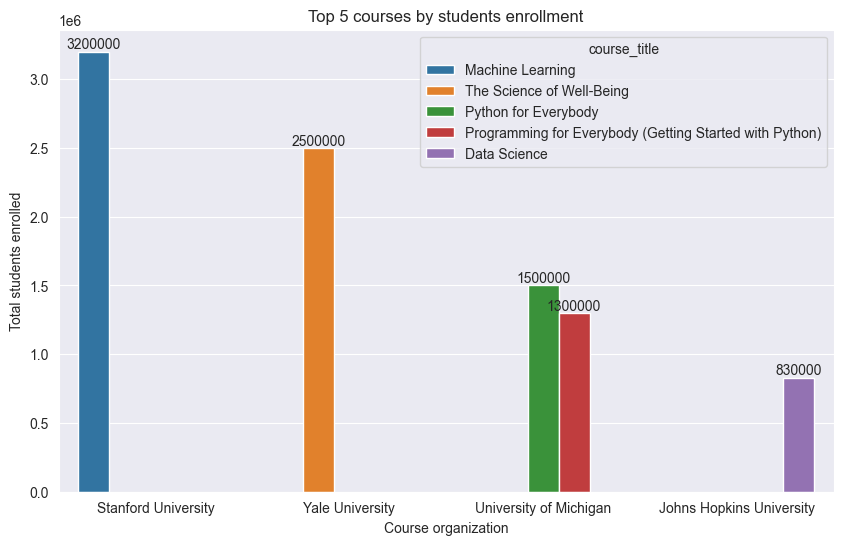

In [10]:
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")

top_cour = sns.barplot(data=top5, x="course_organization", y="course_students_enrolled", hue="course_title")
plt.title("Top 5 courses by students enrollment")
plt.xlabel("Course organization")
plt.ylabel("Total students enrolled")

for container in top_cour.containers:
    top_cour.bar_label(container, fmt="%d", label_type="edge")

plt.show()

In [11]:
print("Total students:", df.course_students_enrolled.sum())

Total students: 80681900.0


In [12]:
df[df.course_students_enrolled == df.course_students_enrolled.min()]

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
251,El Abogado del Futuro: Legaltech y la Transfor...,Universidad Austral,COURSE,5.0,Beginner,1500.0


### Popularity and correlation by ratings
- Most populated are courses with rating of 4.8. Total enrollment is 22,335,600 students.
- Least students are in courses with rating of 5.0. Total enrollment is 3100 students.
- There's moderate possitive correlation of close to 0.6 between students enrollment and course rating.

In [13]:
enroll_rating = df.groupby("course_rating", as_index=False)["course_students_enrolled"].sum()
print(enroll_rating.loc[enroll_rating["course_students_enrolled"].idxmax()])
print("\n")
print(enroll_rating.loc[enroll_rating["course_students_enrolled"].idxmin()])

course_rating                      4.8
course_students_enrolled    22335600.0
Name: 11, dtype: float64


course_rating                  5.0
course_students_enrolled    3100.0
Name: 13, dtype: float64


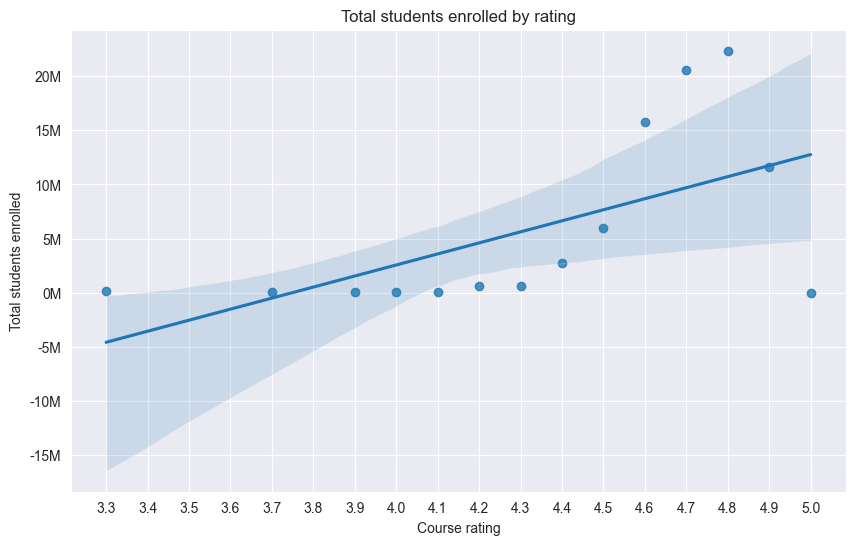

In [14]:
plt.figure(figsize=(10, 6))

sns.regplot(data=enroll_rating, x="course_rating", y="course_students_enrolled")
plt.title("Total students enrolled by rating")
plt.xlabel("Course rating")
plt.ylabel("Total students enrolled")
plt.xticks(np.arange(3.3, 5.1, 0.1))

plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x/1e6:.0f}M"))
plt.show()

In [15]:
enroll_rating.corr()

,course_rating,course_students_enrolled
course_rating,1.00000,0.59871
course_students_enrolled,0.59871,1.00000


***
## Course by difficulty and certificate types
- Most occuring difficulty in this data set is **beginner** with 487 occurences.
- **Advanced** difficulty course is most scarce in this data set with only 19 occurences.
- **Intermediate** and **Mixed** difficulties are pretty close to each other with 198 and 187 occurences respectively.

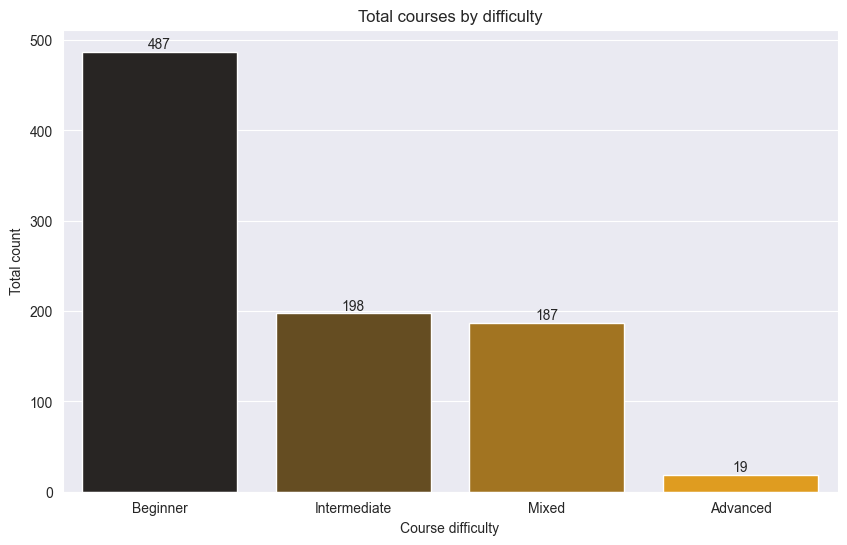

In [16]:
plt.figure(figsize=(10, 6))
dfc = sns.countplot(data=df, x="course_difficulty", hue="course_difficulty", palette="dark:orange")
plt.title("Total courses by difficulty")
plt.xlabel("Course difficulty")
plt.ylabel("Total count")

for container in dfc.containers:
    dfc.bar_label(container, fmt="%d", label_type="edge")

plt.show()

### Course difficulty levels by certification types
- **Course** certificate appears total of 582 times.
  - 9 times in **Advanced** difficulty
  - 282 times in **Beginner** difficulty
  - 104 in **Intermediate** difficulty
  - 187 in **Mixed** difficulty
- **Specialization** certificate is offered in 297 programs.
  - 10 in **Advanced**
  - 196 in **Beginner**
  - 91 in **Intermediate**
- **Professional Certificate** is only offered by 12 programs.
  - 9 in **Beginner**
  - 3 in **Intermediate**

In [17]:
grouped = df.groupby(["course_difficulty", "course_Certificate_type"]).size().reset_index(name="count")
grouped.groupby("course_Certificate_type")["count"].sum()

course_Certificate_type
COURSE                      582
PROFESSIONAL CERTIFICATE     12
SPECIALIZATION              297
Name: count, dtype: int64

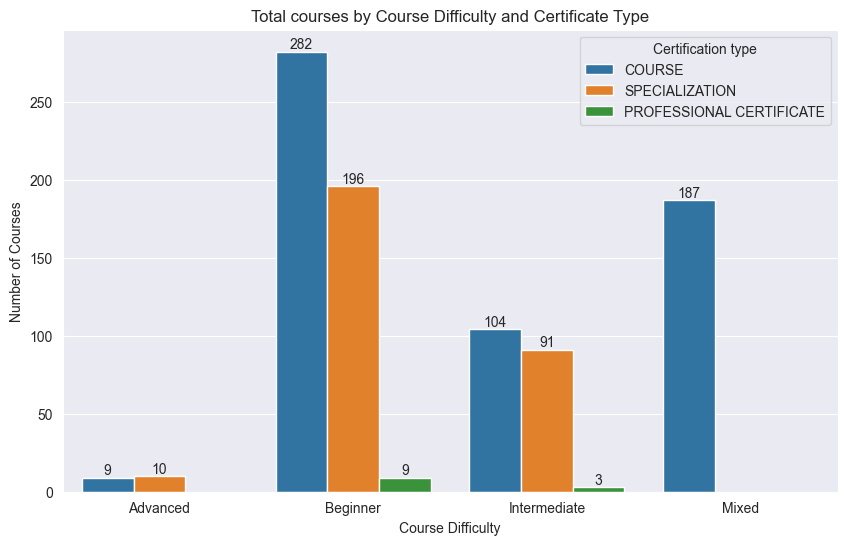

In [18]:
grouped = df.groupby(["course_difficulty", "course_Certificate_type"]).size().reset_index(name="count")

plt.figure(figsize=(10, 6))
dfc_cert = sns.barplot(data=grouped, x="course_difficulty", y="count", 
                  hue="course_Certificate_type")

for container in dfc_cert.containers:
    dfc_cert.bar_label(container, fmt="%d", label_type="edge")

plt.xlabel("Course Difficulty")
plt.ylabel("Number of Courses")
plt.title("Total courses by Course Difficulty and Certificate Type")
plt.legend(title="Certification type")

plt.show()

### Courses by Ratings and Certification
Majority of courses fall in to 4.6-4.8 rating which is:  
- 455 out of 582 for **Course**
- 210 out of 297 for **Specialization**
- 10 out of 12 for **Professional Certificate**

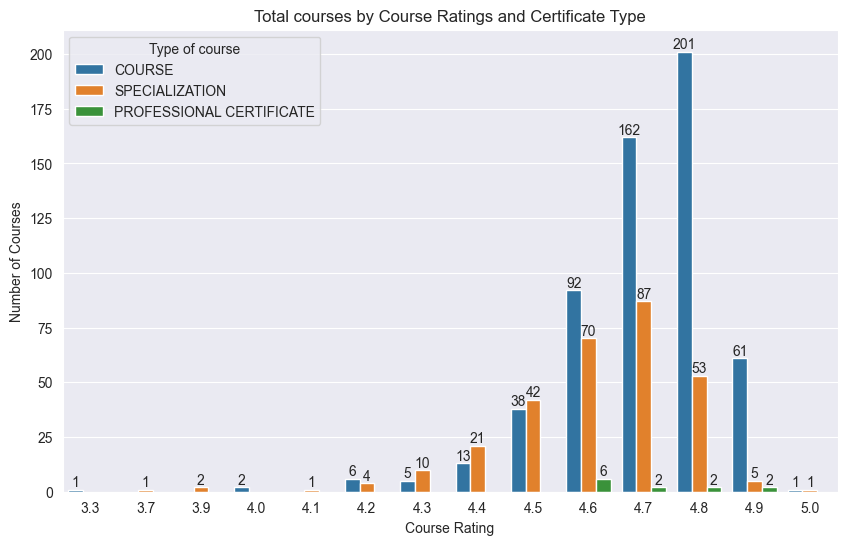

In [19]:
grouped = df.groupby(["course_rating", "course_Certificate_type"]).size().reset_index(name="count")

plt.figure(figsize=(10, 6))
cert = sns.barplot(data=grouped, x="course_rating", y="count", 
                  hue="course_Certificate_type")

for container in cert.containers:
    cert.bar_label(container, fmt="%d", label_type="edge")

plt.xlabel("Course Rating")
plt.ylabel("Number of Courses")
plt.title("Total courses by Course Ratings and Certificate Type")
plt.legend(title="Type of course")

plt.show()

***
## Course by organization

Top 5 by number of offered courses are:
1. University of Pennsylvania - 59
2. University of Michigan - 41
3. Google Cloud - 34
4. Duke University - 28
5. Johns Hopkins University - 28

In [24]:
reps = df[["course_organization"]].value_counts().reset_index().hea
reps

,course_organization,count
0,University of Pennsylvania,59
1,University of Michigan,41
2,Google Cloud,34
3,Johns Hopkins University,28
4,Duke University,28
...,...,...
149,University of Lausanne,1
150,University of New Mexico,1
151,VMware,1
152,École Polytechnique,1


Text(0, 0.5, 'Organization')

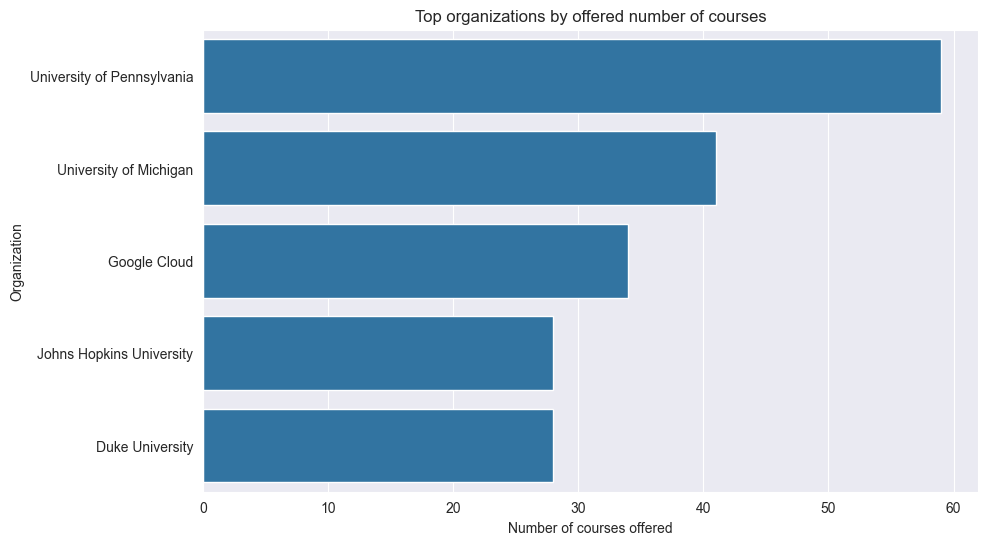

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(data=reps.head(), x="count", y="course_organization")
plt.title("Top organizations by offered number of courses")
plt.xlabel("Number of courses offered")
plt.ylabel("Organization")

***

## TLDR

***
With more data features there would be more accurate analysis